In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# fonte dos dados: https://prefeitura.pbh.gov.br/saude/coronavirus
# > BOLETIM EPIDEMIOLÓGICO E ASSISTENCIAL
df = pd.read_csv('covid-bh.csv')
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,15-05-2020,1088,NaN,NaN,29.0
1,18-05-2020,1189,156.0,1002.0,31.0
2,19-05-2020,1249,155.0,1061.0,33.0
3,20-05-2020,1249,NaN,NaN,35.0
4,21-05-2020,1316,187.0,1090.0,36.0
...,...,...,...,...,...
86,16-09-2020,38629,2673.0,34810.0,1146.0
87,17-09-2020,38978,2713.0,35113.0,1152.0
88,18-09-2020,39321,2720.0,35441.0,1160.0
89,21-09-2020,39379,2384.0,35827.0,1168.0


In [4]:
df.dtypes

DATA                  object
CONFIRMADOS            int64
EM ACOMPANHAMENTO    float64
RECUPERADOS          float64
ÓBITOS               float64
dtype: object

In [5]:
df['ÓBITOS']

0       29.0
1       31.0
2       33.0
3       35.0
4       36.0
       ...  
86    1146.0
87    1152.0
88    1160.0
89    1168.0
90    1172.0
Name: ÓBITOS, Length: 91, dtype: float64

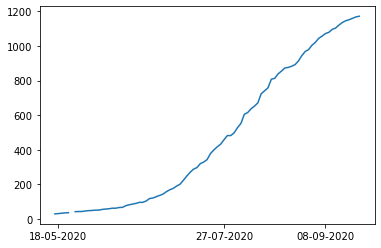

In [6]:
plt.xticks([1,50,80])
plt.plot(df['DATA'], df['ÓBITOS'])

In [7]:
df = df.dropna().reset_index(drop=True)

In [8]:
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,18-05-2020,1189,156.0,1002.0,31.0
1,19-05-2020,1249,155.0,1061.0,33.0
2,21-05-2020,1316,187.0,1090.0,36.0
3,25-05-2020,1444,275.0,1127.0,42.0
4,26-05-2020,1534,280.0,1211.0,43.0
...,...,...,...,...,...
79,16-09-2020,38629,2673.0,34810.0,1146.0
80,17-09-2020,38978,2713.0,35113.0,1152.0
81,18-09-2020,39321,2720.0,35441.0,1160.0
82,21-09-2020,39379,2384.0,35827.0,1168.0


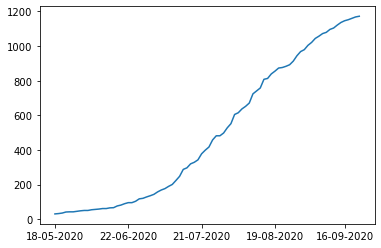

In [9]:
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], df['ÓBITOS'])

In [10]:
df['RECUPERADOSNOVOS'] = df['RECUPERADOS'].diff()
df['RECUPERADOSNOVOS'][0] = 0

<ipython-input-10-d5e2d50be54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECUPERADOSNOVOS'][0] = 0


In [11]:
df['RECUPERADOSNOVOS'][0]

0.0

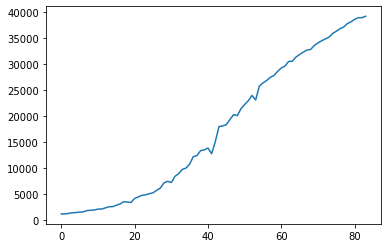

In [14]:
# if recovered means removed (recovered + dead) 
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS']
plt.plot(range(0,len(sick)), sick)

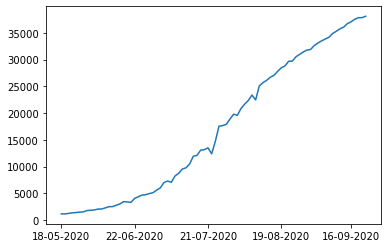

In [13]:
# if recovered really means recovered
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS'] - df['ÓBITOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)